In [379]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np

## 爬取数据

In [391]:
import requests

url = "https://xiaoyuan.zhaopin.com/api/sou"

params = {
    'S_SOU_FULL_INDEX': "数据分析",
    'S_SOU_POSITION_SOURCE_TYPE': "",
    'pageIndex': "20",
    'S_SOU_POSITION_TYPE': "2",
    'S_SOU_WORK_CITY': "",
    'S_SOU_JD_INDUSTRY_LEVEL': "",
    'S_SOU_COMPANY_TYPE': "",
    'S_SOU_REFRESH_DATE': "",
    'order': "12",
    'pageSize': "50",
    '_v': "0.04397681",
    'version': "0.0.0",
    'at': "94aebecdf1e4411aadac2ae058e86012",
    'rt': "1f5dc1d7f49543359396d0cdc1376db6",
    'x-zp-page-request-id': "dd206ffb8a684543aa7f012cadd902ba-1719562956911-77126",
    'x-zp-client-id': "06e9851d-a95e-4985-be80-fbf8d2ff2f3c"
}

headers = {
    'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36",
    'Accept-Encoding': "gzip, deflate, br, zstd",
    'sec-ch-ua': "\"Not/A)Brand\";v=\"8\", \"Chromium\";v=\"126\"",
    'sec-ch-ua-mobile': "?0",
    'x-zp-rt': "1f5dc1d7f49543359396d0cdc1376db6",
    'x-zp-business-system': "14",
    'x-zp-platform': "14",
    'x-zp-at': "94aebecdf1e4411aadac2ae058e86012",
    'sec-ch-ua-platform': "\"Windows\"",
    'sec-fetch-site': "same-origin",
    'sec-fetch-mode': "cors",
    'sec-fetch-dest': "empty",
    'referer': "https://xiaoyuan.zhaopin.com/search/index?jn=2&pg=1&kw=%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90",
    'accept-language': "zh-CN,zh;q=0.9",
    'dnt': "1",
    'sec-gpc': "1",
    'priority': "u=1, i",
    'Cookie': "x-zp-client-id=06e9851d-a95e-4985-be80-fbf8d2ff2f3c; sensorsdata2015jssdkchannel=%7B%22prop%22%3A%7B%22_sa_channel_landing_url%22%3A%22%22%7D%7D; LastCity=%E4%BD%9B%E5%B1%B1; LastCity%5Fid=768; locationInfo_search={%22code%22:%22768%22%2C%22name%22:%22%E4%BD%9B%E5%B1%B1%22%2C%22message%22:%22%E5%8C%B9%E9%85%8D%E5%88%B0%E5%B8%82%E7%BA%A7%E7%BC%96%E7%A0%81%22}; at=94aebecdf1e4411aadac2ae058e86012; rt=1f5dc1d7f49543359396d0cdc1376db6; selectCity_search=763; sts_deviceid=1905dd942d31132-066c2b31e3a2d8-26001f51-1821369-1905dd942d414fd; ZP_OLD_FLAG=false; sts_sg=1; sts_evtseq=1; sts_sid=1905dd94721572-0f7a4b8854c077-26001f51-1821369-1905dd9472217a6; sts_chnlsid=Unknown; zp_src_url=https%3A%2F%2Fpassport.zhaopin.com%2F; ZL_REPORT_GLOBAL={%22/resume/new%22:{%22actionid%22:%220c92f7bf-c539-42ca-9014-e40c22348192%22%2C%22funczone%22:%22addrsm_ok_rcm%22}}; acw_tc=2760829817195616380287619e0411efe44e36dd75c24d26023a7c5349bed6; campusOperateJobUserInfo=1d8d44e1-8624-412b-92fc-f43ba6c18dcb; sensorsdata2015jssdkcross=%7B%22distinct_id%22%3A%221203661111%22%2C%22first_id%22%3A%221904d038a42696-09ca9f6dea3a4b-26001f51-1821369-1904d038a4396c%22%2C%22props%22%3A%7B%22%24latest_traffic_source_type%22%3A%22%E7%9B%B4%E6%8E%A5%E6%B5%81%E9%87%8F%22%2C%22%24latest_search_keyword%22%3A%22%E6%9C%AA%E5%8F%96%E5%88%B0%E5%80%BC_%E7%9B%B4%E6%8E%A5%E6%89%93%E5%BC%80%22%2C%22%24latest_referrer%22%3A%22%22%7D%2C%22identities%22%3A%22eyIkaWRlbnRpdHlfY29va2llX2lkIjoiMTkwNGQwMzhhNDI2OTYtMDljYTlmNmRlYTNhNGItMjYwMDFmNTEtMTgyMTM2OS0xOTA0ZDAzOGE0Mzk2YyIsIiRpZGVudGl0eV9sb2dpbl9pZCI6IjEyMDM2NjExMTEifQ%3D%3D%22%2C%22history_login_id%22%3A%7B%22name%22%3A%22%24identity_login_id%22%2C%22value%22%3A%221203661111%22%7D%2C%22%24device_id%22%3A%221904d038a42696-09ca9f6dea3a4b-26001f51-1821369-1904d038a4396c%22%7D"
}

params["pageSize"] = 50

# 搜索分类
search_param_list = ["数据分析", "数据开发", "数据集挖掘", "爬虫工程师", "数据架构师"]

# 假设你已经定义了 df 并初始化了列名
df = pd.DataFrame(columns=["name", "workCity", "workType", "workingExp", "companySize",
                  "education", "jobSummary", "companyName", "salaryReal", "recruitNumber", "property"])

# 获取请求的函数


def parse_response(search_param_list, pageSize, df):
    for search_param in search_param_list:
        for index in range(20):
            print(f"爬取{search_param}类第{index+1}页数据，已爬取数据量:{(index+1)*50}")
            params["pageSize"] = pageSize
            params["S_SOU_FULL_INDEX"] = search_param
            params["pageIndex"] = index + 1
            response = requests.get(url, params=params, headers=headers)

            res = response.json()["data"]["data"]["list"]

            df_ = pd.DataFrame(res, columns=df.columns.tolist())
            df = pd.concat([df, df_], ignore_index=True)
        time.sleep(5)
    return df


# 调用函数并传入 df
response_df = parse_response(search_param_list, params["pageSize"], df)
response_df

爬取数据分析类第1页数据，已爬取数据量:50
爬取数据分析类第2页数据，已爬取数据量:100
爬取数据分析类第3页数据，已爬取数据量:150
爬取数据分析类第4页数据，已爬取数据量:200
爬取数据分析类第5页数据，已爬取数据量:250
爬取数据分析类第6页数据，已爬取数据量:300
爬取数据分析类第7页数据，已爬取数据量:350
爬取数据分析类第8页数据，已爬取数据量:400
爬取数据分析类第9页数据，已爬取数据量:450
爬取数据分析类第10页数据，已爬取数据量:500
爬取数据分析类第11页数据，已爬取数据量:550
爬取数据分析类第12页数据，已爬取数据量:600
爬取数据分析类第13页数据，已爬取数据量:650
爬取数据分析类第14页数据，已爬取数据量:700
爬取数据分析类第15页数据，已爬取数据量:750
爬取数据分析类第16页数据，已爬取数据量:800
爬取数据分析类第17页数据，已爬取数据量:850
爬取数据分析类第18页数据，已爬取数据量:900
爬取数据分析类第19页数据，已爬取数据量:950
爬取数据分析类第20页数据，已爬取数据量:1000
爬取数据开发类第1页数据，已爬取数据量:50
爬取数据开发类第2页数据，已爬取数据量:100
爬取数据开发类第3页数据，已爬取数据量:150
爬取数据开发类第4页数据，已爬取数据量:200
爬取数据开发类第5页数据，已爬取数据量:250
爬取数据开发类第6页数据，已爬取数据量:300
爬取数据开发类第7页数据，已爬取数据量:350
爬取数据开发类第8页数据，已爬取数据量:400
爬取数据开发类第9页数据，已爬取数据量:450
爬取数据开发类第10页数据，已爬取数据量:500
爬取数据开发类第11页数据，已爬取数据量:550
爬取数据开发类第12页数据，已爬取数据量:600
爬取数据开发类第13页数据，已爬取数据量:650
爬取数据开发类第14页数据，已爬取数据量:700
爬取数据开发类第15页数据，已爬取数据量:750
爬取数据开发类第16页数据，已爬取数据量:800
爬取数据开发类第17页数据，已爬取数据量:850
爬取数据开发类第18页数据，已爬取数据量:900
爬取数据开发类第19页数据，已爬取数据量:950
爬取数据开发类第20页数据，已爬取数据量:1000
爬取数据集挖掘类第1页数据，已爬取数

,name,workCity,workType,workingExp,companySize,education,jobSummary,companyName,salaryReal,recruitNumber,property
0,数据分析,乌兰察布,全职,3-5年,1000-9999人,本科,岗位职责：1、协助本部门完成数据整理、分析与利用，及时提供信息支持，定期追踪业绩及其他关键业...,三爱富公司,0-0,0,国企
1,数据分析师（校招）,上海,全职,无经验,100-299人,硕士,岗位介绍1、负责项目的需求调研、数据分析、商业分析和数据挖掘模型等；2、通过统计和数据挖掘算...,交银金融科技有限公司,11000-12000,0,国企
2,数据分析,成都,全职,无经验,100-299人,本科,岗位职责：1、数据分析：基于海量数据，运用数据挖掘、数据分析理论对游戏日常运营中各种数据进行...,Metajoy,0-0,1,合资
3,数据/业务分析师,香港,全职,5-10年,1000-9999人,本科,"- 与业务部门合作, 了解市场和客户需求, 进行深入数据分析- 利用新数据点和模型进行分析,...",星展银行(香港)有限公司,0-0,4,银行
4,数据分析师,丽水,全职,无经验,500-999人,学历不限,财务、统计、数据分析类相关专业,浙江青山钢铁有限公司,5000-8000,2,事业单位
...,...,...,...,...,...,...,...,...,...,...,...
4995,新型数据库系统研发工程师,深圳,校园,无经验,300-499人,本科,职责描述：参与新型数据库系统/数据库后端的研发，在资深工程师的指导下完成特性的设计、开发、测...,深圳计算科学研究院,15001-25000,5,事业单位
4996,【国企正编-世界五百强：数据督导岗】,温州,全职,不限,1000-9999人,本科,【公司简介】关键词：A+H股上市，双料世界500强，正部级央企，股东背景雄厚，财务稳健成长新...,新华人寿保险股份有限公司浙江分公司,6001-8000,2,国企
4997,Java高级开发工程师/专家-黄页商业化(J29641),北京,全职,不限,10000人以上,本科,岗位职责:1、负责商业广告多种商业产品（产品类型如cpc、ocpc、cpm、cpt等）检索侧...,北京五八信息技术有限公司,25001-40000,1,合资
4998,SFE,广州,全职,不限,1000-9999人,本科,"•University degree in Finance, Commerce or Eco...",广州洁特生物过滤股份有限公司,10001-15000,1,上市公司


In [392]:
# 数据写入到output.csv中
response_df.to_csv("output.csv")

In [442]:
csv_data = pd.read_csv("output.csv")
csv_data.head(2)
df = csv_data

## 总体看下

In [443]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     5000 non-null   int64 
 1   name           5000 non-null   object
 2   workCity       5000 non-null   object
 3   workType       5000 non-null   object
 4   workingExp     5000 non-null   object
 5   companySize    4977 non-null   object
 6   education      5000 non-null   object
 7   jobSummary     5000 non-null   object
 8   companyName    5000 non-null   object
 9   salaryReal     5000 non-null   object
 10  recruitNumber  5000 non-null   int64 
 11  property       4539 non-null   object
dtypes: int64(2), object(10)
memory usage: 468.9+ KB


,Unnamed: 0,recruitNumber
count,5000.000000,5000.000000
mean,2499.500000,9.930400
std,1443.520003,68.047122
min,0.000000,0.000000
25%,1249.750000,1.000000
50%,2499.500000,2.000000
75%,3749.250000,5.000000
max,4999.000000,999.000000


In [444]:
# 删除重复的
df[df.duplicated()]
df = df.drop_duplicates()

In [445]:
df.isnull().sum()

Unnamed: 0         0
name               0
workCity           0
workType           0
workingExp         0
companySize       23
education          0
jobSummary         0
companyName        0
salaryReal         0
recruitNumber      0
property         461
dtype: int64

# 数据处理

## 招聘人数箱线图

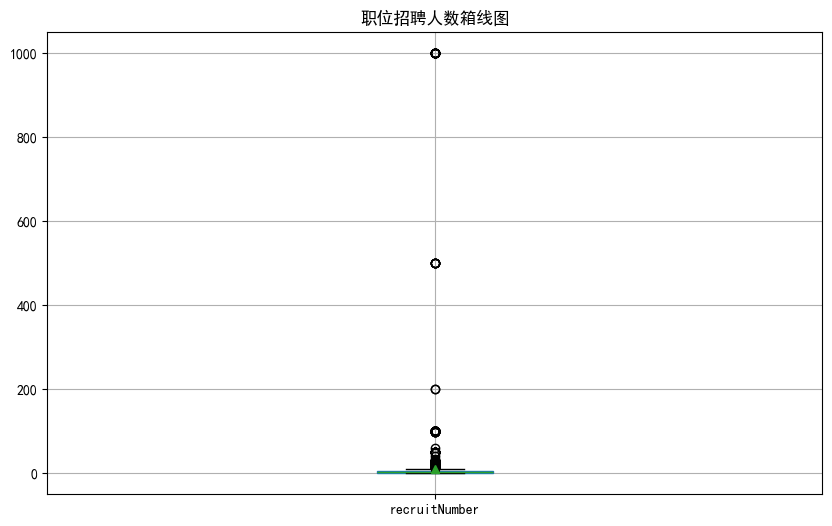

In [446]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
df[['recruitNumber']].boxplot(sym='o',  # 异常点形状，参考marker
                              vert=True,
                              patch_artist=True,  # 上下四分卫框内是否填充，True为填充
                              meanline=False, showmeans=True,  # 是否有均值线及其形状
                              showbox=True,  # 是否显示箱线
                              showcaps=True,  # 是否显示边缘线,
                              showfliers=True,  # 是否显示异常值
                              notch=False,  # 中间箱体是否缺口
                              figsize=(10, 6),
                              return_type='dict')
plt.title('职位招聘人数箱线图')
plt.show()

从上面图可看出有一些数据明细不合理，不少数据都在200、500、1000这个点上，这么多大量招一样数量的人显然是不合理的，这可能是一些公司没有设置招聘人数的默认值，于是我们数据清洗时可以去掉这些值

In [447]:
# 看了下招聘岗位>100的数据量有360条
df[df['recruitNumber'] > 100].size

360

开始数据清洗

In [448]:
# 删除招聘岗位为0的数据
df.drop(df[df['recruitNumber'] == 0].index,inplace=True)
# 删除第一列
df = df.drop(df.columns[0], axis=1)
# 删除companySize列中含有空值的行
df = df.dropna(subset=['companySize'])
# 删除property列中含有空值的行
df = df.dropna(subset=['property'])
# 确保recruitNumber列是数值类型，如果有非数值数据则会导致错误
df['recruitNumber'] = pd.to_numeric(df['recruitNumber'], errors='coerce')
# 删除recruitNumber列中大于100的行
df = df[df['recruitNumber'] <= 100]
# 过滤掉'salaryReal'列中值为'0-0'的行
df = df[df['salaryReal'] != '0-0']


# 保存修改后的文件
output_path = 'output_cleaned.csv'
df.to_csv(output_path, index=False)
csv_data = pd.read_csv("output_cleaned.csv")
df = csv_data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4059 entries, 0 to 4058
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4059 non-null   object
 1   workCity       4059 non-null   object
 2   workType       4059 non-null   object
 3   workingExp     4059 non-null   object
 4   companySize    4059 non-null   object
 5   education      4059 non-null   object
 6   jobSummary     4059 non-null   object
 7   companyName    4059 non-null   object
 8   salaryReal     4059 non-null   object
 9   recruitNumber  4059 non-null   int64 
 10  property       4059 non-null   object
dtypes: int64(1), object(10)
memory usage: 348.9+ KB


# 数据分析
# 招聘人数直方图

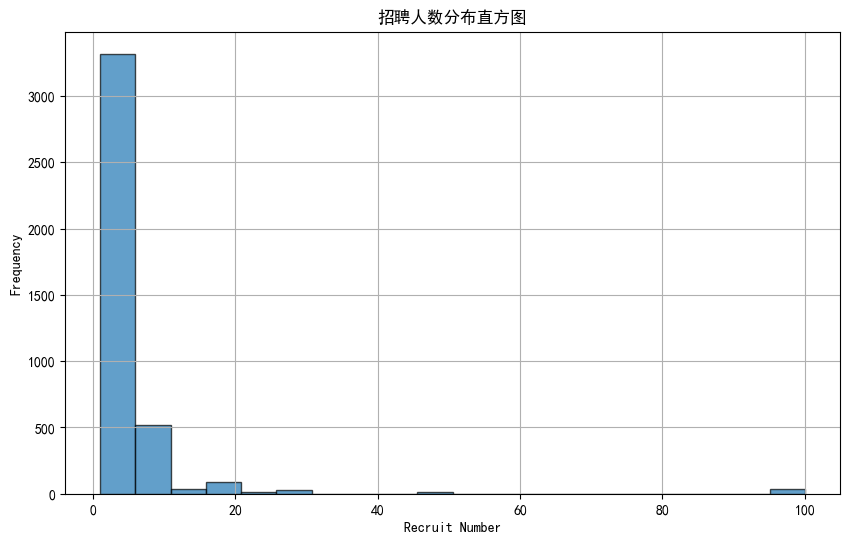

In [449]:
# 提取recruitNumber列数据
recruit_number = df['recruitNumber']

# 绘制直方图
plt.figure(figsize=(10, 6))
plt.hist(recruit_number.dropna(), bins=20, edgecolor='k', alpha=0.7)
plt.title('招聘人数分布直方图')
plt.xlabel('Recruit Number')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 招聘类型柱状图

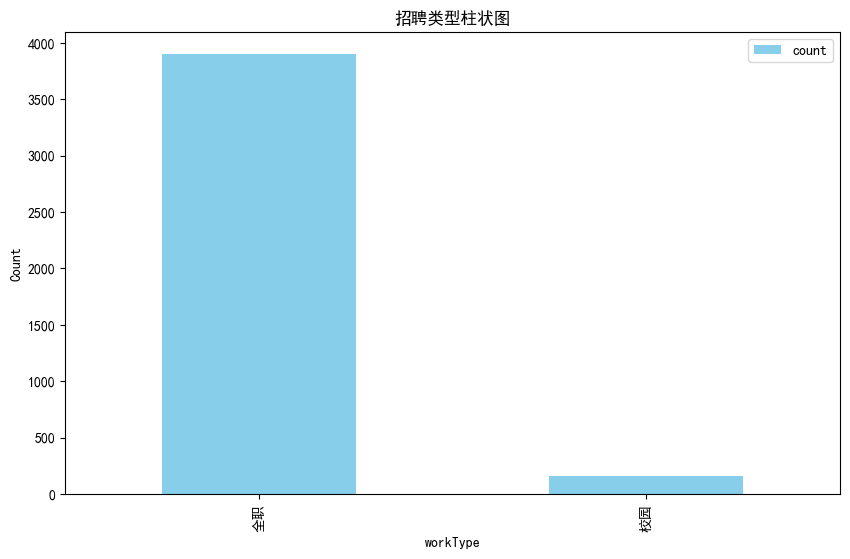

In [450]:
# 使用 value_counts() 统计每种类型的数量
workType_counts = df['workType'].value_counts()
# 设置图表大小
plt.figure(figsize=(10, 6))

# 绘制柱状图
workType_counts.plot(kind='bar', color='skyblue')

# 添加标题和标签
plt.title('招聘类型柱状图')
plt.xlabel('workType')
plt.ylabel('Count')

# 显示图例
plt.legend()

# 展示图表
plt.show()


# 平均薪资直方图

In [451]:
df.head(2)

,name,workCity,workType,workingExp,companySize,education,jobSummary,companyName,salaryReal,recruitNumber,property
0,数据分析师,丽水,全职,无经验,500-999人,学历不限,财务、统计、数据分析类相关专业,浙江青山钢铁有限公司,5000-8000,2,事业单位
1,数据分析 电商运营,扬州,全职,不限,100-299人,本科,公司总部在义乌，成立于2006年，扬州、合肥、武汉为分公司，公司岗位优势：1.公司有专业的电...,义乌市微星百货有限公司,5000-10000,16,民营


In [452]:
import re

df['low_salary'] = df['salaryReal'].apply(
    lambda x: int(re.search('(\d+)-', x).group(1)))    # 最低薪资
df['high_salary'] = df['salaryReal'].apply(
    lambda x: int(re.search('-(\d+)', x).group(1)))    # 最高薪资
df['avg_salary'] = (df['low_salary'] + df['high_salary']
                       ) / 2

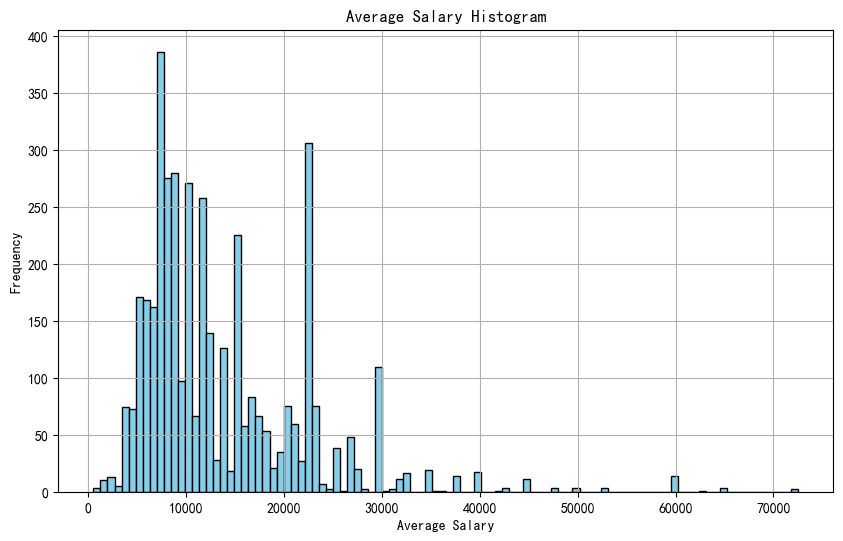

In [453]:
# # 定义一个函数来解析薪资范围并返回平均值
# def parse_salary_range(salary_range):
#     # 假设 salary_range 的格式为 "min-max"
#     min_salary, max_salary = map(int, salary_range.split('-'))
#     return (min_salary + max_salary) / 2


# # 将 salaryReal 列中的数据应用这个函数，得到平均薪资列
# df['avg_salary'] = df['salaryReal'].apply(parse_salary_range)
# 设置图表大小
plt.figure(figsize=(10, 6))

# 绘制直方图
plt.hist(df['avg_salary'], bins=100, color='skyblue', edgecolor='black')

# 添加标题和标签
plt.title('Average Salary Histogram')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')

# 显示网格线
plt.grid(True)

# 展示图表
plt.show()

## 岗位技能skills需求分析
# 软件能力分析

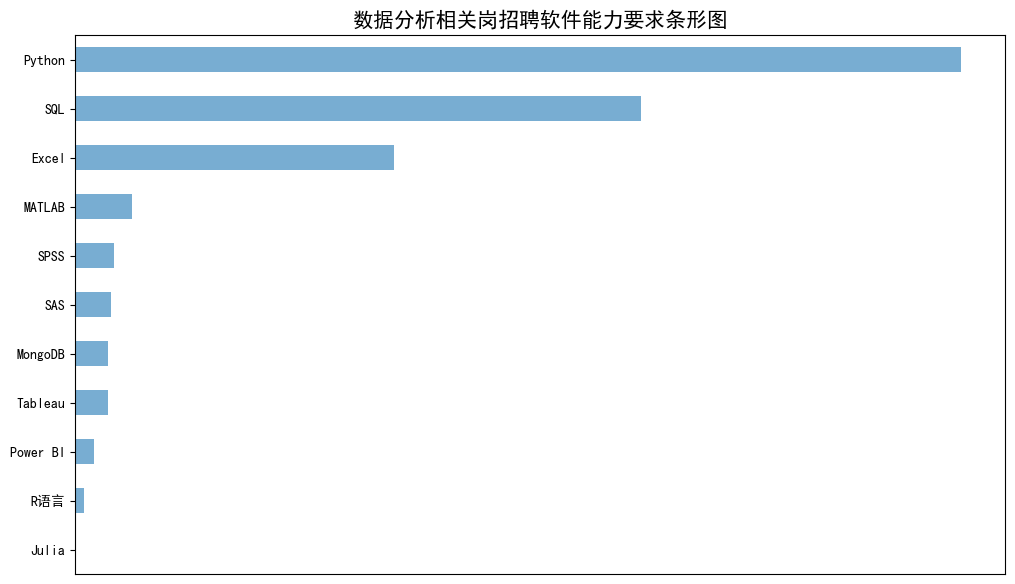

In [454]:
import re
def del_english(st):
    '''
    删除全是英文与大量英文的字符串（因为存在全英文的JD,会干扰分析）
    '''
    all_pattern = re.compile(u'[\u4e00-\u9fa5]')
    p_pattern = re.compile('[a-zA-Z]')
    prop = (len(st) - len(re.findall(p_pattern, st))) / len(st)  # 非英文占总文本长度的比例
    if re.search(all_pattern, st) and (prop >= 0.8):
        return st
    else:
        return ''


def del_r(st):
    '''
    删除带有R的与R语言无关的内容
    '''
    st = st.replace('ERP', '').replace('VR', '').replace('ROI', '').replace(
        'EPR', '').replace('CRM', '').replace('HR', '').replace('CRF', '').replace('IAR', '')
    return st


def extract(st):
    '''
    在每条jd（type: str）中查找并提取要求的软件能力
    返回：列表
    '''
    software_ability = []  # 初始化“软件能力要求”变量
    # 编程式数据分析工具
    if ('python' in st) or ('Python' in st) or ('PYTHON' in st):
        software_ability.append('Python')
    if 'R语言' in st:
        software_ability.append('R语言')
    if ('matlab' in st) or ('MATLAB' in st) or ('Matlab' in st):
        software_ability.append('MATLAB')
    if ('julia' in st) or ('Julia' in st) or ('JULIA' in st):
        software_ability.append('Julia')
    if ('SAS' in st) or ('sas' in st):
        software_ability.append('SAS')
    # 菜单式数据分析工具
    if ('Excel' in st) or ('EXCEL' in st) or ('excel' in st):
        software_ability.append('Excel')
    if ('SPSS' in st) or ('spss' in st):
        software_ability.append('SPSS')
    if ('Eviews' in st) or ('eviews' in st) or ('EVIEWS' in st):
        software_ability.append('Eviews')
    # BI可视化工具
    if ('Tableau' in st) or ('tableau' in st):
        software_ability.append('Tableau')
    if ('Power BI' in st) or ('powerbi' in st) or ('power bi' in st) or ('PowerBI' in st):
        software_ability.append('Power BI')
    # if ('java' in st ) or ('Java' in st) or ('JAVA' in st):
    #     software_ability.append('Java')
    # 数据库工具
    sql_condition = ('SQL' in st) or ('sql' in st) or ('Orcale' in st) or ('orcale' in st) or ('ORACLE' in st) or ('MySQL' in st) or (
        'Mysql' in st) or ('mysql' in st) or ('SQLServer' in st) or ('SQL Server' in st) or ('sqlserver' in st) or ('sql server' in st)
    if sql_condition:
        software_ability.append('SQL')
    if ('mongodb' in st) or ('MongoDB' in st) or ('Mongodb' in st):
        software_ability.append('MongoDB')
    st = software_ability
    return st

# 将JD里的英文数据全转为小写，方便查找. ×不可，因为R语言
# txt_df['software_ability'] = txt_df['software_ability'].apply(lambda x: x.lower())
# 提取软件能力要求信息
df['software_ability'] = df['jobSummary'].apply(lambda x: extract(x))

# 软件能力要求（12个）：
# - 编程式数据分析工具：Python、R、MATLAB、Julia、SAS(5)
# - 菜单式数据分析工具：Excel、SPSS、Eviews(3)
# - 商业智能工具（可视化）BI：Tableau、Power BI (2)
# - 数据库工具：SQL（Oracle,MySQL，SQLServer）、MongoDB（2）

software = []  # 初始化一个列表
soft_df = df['software_ability'].apply(pd.Series).dropna(how='all')
for a in soft_df.values:
    for b in a:
        if b is not np.nan:
            software.append(b)

soft_count = pd.DataFrame(
    pd.Series(software).value_counts().sort_values(), columns=['count'])

# 绘制条形图
soft_count.plot.barh(alpha=0.6, rot=0,
                     legend=False, figsize=(12, 7))
plt.xticks([])
plt.title('数据分析相关岗招聘软件能力要求条形图', fontsize=15)
plt.show()

In [455]:
with open('jobSummary.txt', 'w', encoding='utf-8') as file:
    for line in df['jobSummary']:
        file.write(line + '\n')

# 词云可视化

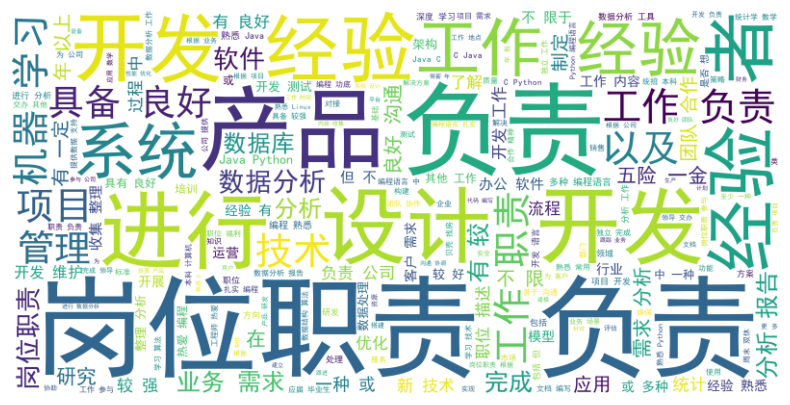

In [456]:
import jieba
from collections import Counter
from wordcloud import WordCloud


# 读取文件内容
with open('jobSummary.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# 使用 jieba 进行中文分词
words = jieba.cut(text)

# 自定义停用词列表
stopwords = set(['专业', '相关', '及', '以上学历', '任职', '要求', '的',
                '和', '能力', '熟练', '掌握', '能够',"大","数据","与","优先","C","等","岗位","对"])

# 移除停用词
filtered_words = [word for word in words if word not in stopwords]
filtered_text = ' '.join(filtered_words)

# 生成词云图
wordcloud = WordCloud(font_path='simhei.ttf', width=800,
                      height=400, background_color='white').generate(filtered_text)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 公司基本信息分析

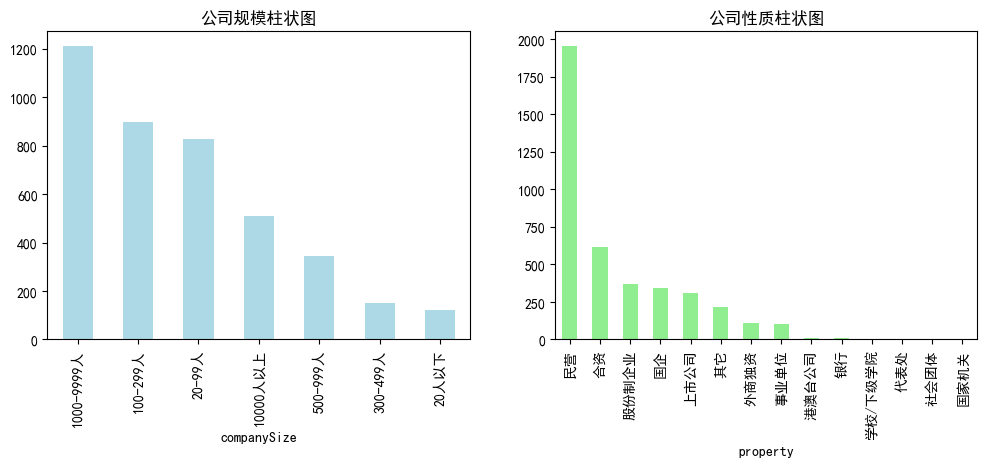

In [457]:
# 公司基本信息包括 公司规模 size、公司性质 quality
size = df['companySize'].value_counts()
quality = df['property'].value_counts()


fig, axes = plt.subplots(1, 2, figsize=(12, 4), dpi=100)

size.plot.bar(ax=axes[0], color="lightblue")
axes[0].set_title('公司规模柱状图')
quality.plot.bar(ax=axes[1], color="lightgreen")
axes[1].set_title('公司性质柱状图')
plt.show()

In [458]:
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.NTERACT

In [459]:
work_city_size = df.loc[:, "workCity"].value_counts()
work_city_size.keys()

Index(['北京', '上海', '深圳', '成都', '杭州', '天津', '重庆', '广州', '南京', '郑州',
       ...
       '韶关', '延安', '肇庆', '文山', '宿迁', '长治', '文昌', '临沧', '葫芦岛', '漳州'],
      dtype='object', name='workCity', length=156)

## 招聘公司地图分布

In [460]:
import pandas as pd
from pyecharts.charts import Map
from pyecharts import options as opts
import numpy as np


# 标准化城市名称，给没有“市”字后缀的城市名称添加“市”
df['workCity'] = df['workCity'].apply(lambda x: x if x.endswith('市') else x + '市')

# 示例城市-省份映射关系字典
city_province_map = {
    # 直辖市
    '北京市': '北京市',
    '天津市': '天津市',
    '上海市': '上海市',
    '重庆市': '重庆市',

    # 河北省
    '石家庄市': '河北省',
    '唐山市': '河北省',
    '秦皇岛市': '河北省',
    '邯郸市': '河北省',
    '邢台市': '河北省',
    '保定市': '河北省',
    '张家口市': '河北省',
    '承德市': '河北省',
    '沧州市': '河北省',
    '廊坊市': '河北省',
    '衡水市': '河北省',

    # 山西省
    '太原市': '山西省',
    '大同市': '山西省',
    '阳泉市': '山西省',
    '长治市': '山西省',
    '晋城市': '山西省',
    '朔州市': '山西省',
    '晋中市': '山西省',
    '运城市': '山西省',
    '忻州市': '山西省',
    '临汾市': '山西省',
    '吕梁市': '山西省',

    # 内蒙古自治区
    '呼和浩特市': '内蒙古自治区',
    '包头市': '内蒙古自治区',
    '乌海市': '内蒙古自治区',
    '赤峰市': '内蒙古自治区',
    '通辽市': '内蒙古自治区',
    '鄂尔多斯市': '内蒙古自治区',
    '呼伦贝尔市': '内蒙古自治区',
    '巴彦淖尔市': '内蒙古自治区',
    '乌兰察布市': '内蒙古自治区',
    '兴安盟': '内蒙古自治区',
    '锡林郭勒盟': '内蒙古自治区',
    '阿拉善盟': '内蒙古自治区',

    # 辽宁省
    '沈阳市': '辽宁省',
    '大连市': '辽宁省',
    '鞍山市': '辽宁省',
    '抚顺市': '辽宁省',
    '本溪市': '辽宁省',
    '丹东市': '辽宁省',
    '锦州市': '辽宁省',
    '营口市': '辽宁省',
    '阜新市': '辽宁省',
    '辽阳市': '辽宁省',
    '盘锦市': '辽宁省',
    '铁岭市': '辽宁省',
    '朝阳市': '辽宁省',
    '葫芦岛市': '辽宁省',

    # 吉林省
    '长春市': '吉林省',
    '吉林市': '吉林省',
    '四平市': '吉林省',
    '辽源市': '吉林省',
    '通化市': '吉林省',
    '白山市': '吉林省',
    '松原市': '吉林省',
    '白城市': '吉林省',
    '延边朝鲜族自治州': '吉林省',

    # 黑龙江省
    '哈尔滨市': '黑龙江省',
    '齐齐哈尔市': '黑龙江省',
    '鸡西市': '黑龙江省',
    '鹤岗市': '黑龙江省',
    '双鸭山市': '黑龙江省',
    '大庆市': '黑龙江省',
    '伊春市': '黑龙江省',
    '佳木斯市': '黑龙江省',
    '七台河市': '黑龙江省',
    '牡丹江市': '黑龙江省',
    '黑河市': '黑龙江省',
    '绥化市': '黑龙江省',
    '大兴安岭地区': '黑龙江省',

    # 江苏省
    '南京市': '江苏省',
    '无锡市': '江苏省',
    '徐州市': '江苏省',
    '常州市': '江苏省',
    '苏州市': '江苏省',
    '南通市': '江苏省',
    '连云港市': '江苏省',
    '淮安市': '江苏省',
    '盐城市': '江苏省',
    '扬州市': '江苏省',
    '镇江市': '江苏省',
    '泰州市': '江苏省',
    '宿迁市': '江苏省',

    # 浙江省
    '杭州市': '浙江省',
    '宁波市': '浙江省',
    '温州市': '浙江省',
    '嘉兴市': '浙江省',
    '湖州市': '浙江省',
    '绍兴市': '浙江省',
    '金华市': '浙江省',
    '衢州市': '浙江省',
    '舟山市': '浙江省',
    '台州市': '浙江省',
    '丽水市': '浙江省',

    # 安徽省
    '合肥市': '安徽省',
    '芜湖市': '安徽省',
    '蚌埠市': '安徽省',
    '淮南市': '安徽省',
    '马鞍山市': '安徽省',
    '淮北市': '安徽省',
    '铜陵市': '安徽省',
    '安庆市': '安徽省',
    '黄山市': '安徽省',
    '滁州市': '安徽省',
    '阜阳市': '安徽省',
    '宿州市': '安徽省',
    '六安市': '安徽省',
    '亳州市': '安徽省',
    '池州市': '安徽省',
    '宣城市': '安徽省',

    # 福建省
    '福州市': '福建省',
    '厦门市': '福建省',
    '莆田市': '福建省',
    '三明市': '福建省',
    '泉州市': '福建省',
    '漳州市': '福建省',
    '南平市': '福建省',
    '龙岩市': '福建省',
    '宁德市': '福建省',

    # 江西省
    '南昌市': '江西省',
    '景德镇市': '江西省',
    '萍乡市': '江西省',
    '九江市': '江西省',
    '新余市': '江西省',
    '鹰潭市': '江西省',
    '赣州市': '江西省',
    '吉安市': '江西省',
    '宜春市': '江西省',
    '抚州市': '江西省',
    '上饶市': '江西省',

    # 山东省
    '济南市': '山东省',
    '青岛市': '山东省',
    '淄博市': '山东省',
    '枣庄市': '山东省',
    '东营市': '山东省',
    '烟台市': '山东省',
    '潍坊市': '山东省',
    '济宁市': '山东省',
    '泰安市': '山东省',
    '威海市': '山东省',
    '日照市': '山东省',
    '莱芜市': '山东省',
    '临沂市': '山东省',
    '德州市': '山东省',
    '聊城市': '山东省',
    '滨州市': '山东省',
    '菏泽市': '山东省',

    # 河南省
    '郑州市': '河南省',
    '开封市': '河南省',
    '洛阳市': '河南省',
    '平顶山市': '河南省',
    '安阳市': '河南省',
    '鹤壁市': '河南省',
    '新乡市': '河南省',
    '焦作市': '河南省',
    '濮阳市': '河南省',
    '许昌市': '河南省',
    '漯河市': '河南省',
    '三门峡市': '河南省',
    '南阳市': '河南省',
    '商丘市': '河南省',
    '信阳市': '河南省',
    '周口市': '河南省',
    '驻马店市': '河南省',
    '济源市': '河南省',

    # 湖北省
    '武汉市': '湖北省',
    '黄石市': '湖北省',
    '十堰市': '湖北省',
    '宜昌市': '湖北省',
    '襄阳市': '湖北省',
    '鄂州市': '湖北省',
    '荆门市': '湖北省',
    '孝感市': '湖北省',
    '荆州市': '湖北省',
    '黄冈市': '湖北省',
    '咸宁市': '湖北省',
    '随州市': '湖北省',
    '恩施土家族苗族自治州': '湖北省',
    '仙桃市': '湖北省',
    '潜江市': '湖北省',
    '天门市': '湖北省',
    '神农架林区': '湖北省',

    # 湖南省
    '长沙市': '湖南省',
    '株洲市': '湖南省',
    '湘潭市': '湖南省',
    '衡阳市': '湖南省',
    '邵阳市': '湖南省',
    '岳阳市': '湖南省',
    '常德市': '湖南省',
    '张家界市': '湖南省',
    '益阳市': '湖南省',
    '郴州市': '湖南省',
    '永州市': '湖南省',
    '怀化市': '湖南省',
    '娄底市': '湖南省',
    '湘西土家族苗族自治州': '湖南省',

    # 广东省
    '广州市': '广东省',
    '韶关市': '广东省',
    '深圳市': '广东省',
    '珠海市': '广东省',
    '汕头市': '广东省',
    '佛山市': '广东省',
    '江门市': '广东省',
    '湛江市': '广东省',
    '茂名市': '广东省',
    '肇庆市': '广东省',
    '惠州市': '广东省',
    '梅州市': '广东省',
    '汕尾市': '广东省',
    '河源市': '广东省',
    '阳江市': '广东省',
    '清远市': '广东省',
    '东莞市': '广东省',
    '中山市': '广东省',
    '潮州市': '广东省',
    '揭阳市': '广东省',
    '云浮市': '广东省',

    # 广西壮族自治区
    '南宁市': '广西壮族自治区',
    '柳州市': '广西壮族自治区',
    '桂林市': '广西壮族自治区',
    '梧州市': '广西壮族自治区',
    '北海市': '广西壮族自治区',
    '防城港市': '广西壮族自治区',
    '钦州市': '广西壮族自治区',
    '贵港市': '广西壮族自治区',
    '玉林市': '广西壮族自治区',
    '百色市': '广西壮族自治区',
    '贺州市': '广西壮族自治区',
    '河池市': '广西壮族自治区',
    '来宾市': '广西壮族自治区',
    '崇左市': '广西壮族自治区',

    # 海南省
    '海口市': '海南省',
    '三亚市': '海南省',
    '三沙市': '海南省',
    '儋州市': '海南省',

    # 四川省
    '成都市': '四川省',
    '自贡市': '四川省',
    '攀枝花市': '四川省',
    '泸州市': '四川省',
    '德阳市': '四川省',
    '绵阳市': '四川省',
    '广元市': '四川省',
    '遂宁市': '四川省',
    '内江市': '四川省',
    '乐山市': '四川省',
    '南充市': '四川省',
    '眉山市': '四川省',
    '宜宾市': '四川省',
    '广安市': '四川省',
    '达州市': '四川省',
    '雅安市': '四川省',
    '巴中市': '四川省',
    '资阳市': '四川省',
    '阿坝藏族羌族自治州': '四川省',
    '甘孜藏族自治州': '四川省',
    '凉山彝族自治州': '四川省',

    # 贵州省
    '贵阳市': '贵州省',
    '六盘水市': '贵州省',
    '遵义市': '贵州省',
    '安顺市': '贵州省',
    '毕节市': '贵州省',
    '铜仁市': '贵州省',
    '黔西南布依族苗族自治州': '贵州省',
    '黔东南苗族侗族自治州': '贵州省',
    '黔南布依族苗族自治州': '贵州省',

    # 云南省
    '昆明市': '云南省',
    '曲靖市': '云南省',
    '玉溪市': '云南省',
    '保山市': '云南省',
    '昭通市': '云南省',
    '丽江市': '云南省',
    '普洱市': '云南省',
    '临沧市': '云南省',
    '楚雄彝族自治州': '云南省',
    '红河哈尼族彝族自治州': '云南省',
    '文山壮族苗族自治州': '云南省',
    '西双版纳傣族自治州': '云南省',
    '大理白族自治州': '云南省',
    '德宏傣族景颇族自治州': '云南省',
    '怒江傈僳族自治州': '云南省',
    '迪庆藏族自治州': '云南省',

    # 西藏自治区
    '拉萨市': '西藏自治区',
    '日喀则市': '西藏自治区',
    '昌都市': '西藏自治区',
    '林芝市': '西藏自治区',
    '山南市': '西藏自治区',
    '那曲市': '西藏自治区',
    '阿里地区': '西藏自治区',

    # 陕西省
    '西安市': '陕西省',
    '铜川市': '陕西省',
    '宝鸡市': '陕西省',
    '咸阳市': '陕西省',
    '渭南市': '陕西省',
    '延安市': '陕西省',
    '汉中市': '陕西省',
    '榆林市': '陕西省',
    '安康市': '陕西省',
    '商洛市': '陕西省',

    # 甘肃省
    '兰州市': '甘肃省',
    '嘉峪关市': '甘肃省',
    '金昌市': '甘肃省',
    '白银市': '甘肃省',
    '天水市': '甘肃省',
    '武威市': '甘肃省',
    '张掖市': '甘肃省',
    '平凉市': '甘肃省',
    '酒泉市': '甘肃省',
    '庆阳市': '甘肃省',
    '定西市': '甘肃省',
    '陇南市': '甘肃省',
    '临夏回族自治州': '甘肃省',
    '甘南藏族自治州': '甘肃省',

    # 青海省
    '西宁市': '青海省',
    '海东市': '青海省',
    '海北藏族自治州': '青海省',
    '黄南藏族自治州': '青海省',
    '海南藏族自治州': '青海省',
    '果洛藏族自治州': '青海省',
    '玉树藏族自治州': '青海省',
    '海西蒙古族藏族自治州': '青海省',

    # 宁夏回族自治区
    '银川市': '宁夏回族自治区',
    '石嘴山市': '宁夏回族自治区',
    '吴忠市': '宁夏回族自治区',
    '固原市': '宁夏回族自治区',
    '中卫市': '宁夏回族自治区',

    # 新疆维吾尔自治区
    '乌鲁木齐市': '新疆维吾尔自治区',
    '克拉玛依市': '新疆维吾尔自治区',
    '吐鲁番市': '新疆维吾尔自治区',
    '哈密市': '新疆维吾尔自治区',
    '昌吉回族自治州': '新疆维吾尔自治区',
    '博尔塔拉蒙古自治州': '新疆维吾尔自治区',
    '巴音郭楞蒙古自治州': '新疆维吾尔自治区',
    '阿克苏地区': '新疆维吾尔自治区',
    '克孜勒苏柯尔克孜自治州': '新疆维吾尔自治区',
    '喀什地区': '新疆维吾尔自治区',
    '和田地区': '新疆维吾尔自治区',
    '伊犁哈萨克自治州': '新疆维吾尔自治区',
    '塔城地区': '新疆维吾尔自治区',
    '阿勒泰地区': '新疆维吾尔自治区',
    '石河子市': '新疆维吾尔自治区',
    '阿拉尔市': '新疆维吾尔自治区',
    '图木舒克市': '新疆维吾尔自治区',
    '五家渠市': '新疆维吾尔自治区',
    '北屯市': '新疆维吾尔自治区',
    '铁门关市': '新疆维吾尔自治区',
    '双河市': '新疆维吾尔自治区',
    '可克达拉市': '新疆维吾尔自治区',
    '昆玉市': '新疆维吾尔自治区',
    '胡杨河市': '新疆维吾尔自治区',

    # 香港特别行政区
    '香港': '香港特别行政区',

    # 澳门特别行政区
    '澳门': '澳门特别行政区',

    # 台湾省
    '台北市': '台湾省',
    '高雄市': '台湾省',
    '台南市': '台湾省',
    '台中市': '台湾省',
    '金门县': '台湾省',
    '南投县': '台湾省',
    '基隆市': '台湾省',
    '新竹市': '台湾省',
    '嘉义市': '台湾省',
    '新北市': '台湾省',
    '宜兰县': '台湾省',
    '新竹县': '台湾省',
    '桃园市': '台湾省',
    '苗栗县': '台湾省',
    '彰化县': '台湾省',
    '嘉义县': '台湾省',
    '云林县': '台湾省',
    '屏东县': '台湾省',
    '台东县': '台湾省',
    '花莲县': '台湾省',
    '澎湖县': '台湾省'
}

# 根据城市名称映射到省份
df['province'] = df['workCity'].map(city_province_map)

# 统计省份频次
province_counts = df['province'].value_counts().reset_index()
province_counts.columns = ['province', 'province_count']

# 创建 Map 对象
province_list = list(zip(province_counts['province'], province_counts['province_count']))
map_chart = Map()

# 添加省份热力数据
map_chart.add(
    "省份热力",
    province_list,
    maptype="china",
    is_map_symbol_show=False
)

# 设置对数缩放，降低阈值，提高对小范围数据的敏感度
province_counts['log_province_count'] = np.log1p(province_counts['province_count'])

# 使用对数缩放后的数据
province_list_log = list(zip(province_counts['province'], province_counts['log_province_count']))

map_chart_log = Map()
map_chart_log.add(
    "省份热力（对数缩放）",
    province_list_log,
    maptype="china",
    is_map_symbol_show=False
)

# 配置图表样式和视觉映射
map_chart.set_series_opts(label_opts=opts.LabelOpts(is_show=True, font_size=10))
map_chart.set_global_opts(
    title_opts=opts.TitleOpts(title="公司分布热力图（省份）"),
    visualmap_opts=opts.VisualMapOpts(
        min_=0,
        max_=province_counts['province_count'].max() * 0.5,  # 降低最大值，增加对比度
        range_color=["#f6e58d", "#ffbe76", "#ff7979", "#eb4d4b", "#e056fd"]
    ),
)

map_chart_log.set_series_opts(label_opts=opts.LabelOpts(is_show=True, font_size=10))
map_chart_log.set_global_opts(
    title_opts=opts.TitleOpts(title="公司分布热力图（对数缩放）"),
    visualmap_opts=opts.VisualMapOpts(
        min_=province_counts['log_province_count'].min(),
        max_=province_counts['log_province_count'].max(),
        range_color=["#f6e58d", "#ffbe76", "#ff7979", "#eb4d4b", "#e056fd"]
    ),
)

# 渲染输出到 HTML
map_chart.render("province_heatmap.html")
map_chart_log.render("province_heatmap_log.html")


'e:\\SynologyDrive\\Fosu\\01_学业\\01_智科\\4_大二(2)\\数据分析课程\\1\\province_heatmap_log.html'

In [461]:
guangdong_data = df[df["province"] == '广东省']
site = guangdong_data.groupby("workCity").size()

gd_map = Map()

city = site.index
valud = site[city]

gd_map.add("", [list(z) for z in zip(city, valud)], maptype="广东")

gd_map.set_series_opts(
    label_opts=opts.LabelOpts(is_show=True, font_size=10))
gd_map.set_global_opts(
    title_opts=opts.TitleOpts(title="公司分布热力图（对数缩放）"),
    visualmap_opts=opts.VisualMapOpts(
        min_=site[city].min(),
        max_=90,
        range_color=["#f6e58d", "#ffbe76", "#ff7979", "#eb4d4b", "#e056fd"]
    ),
)
gd_map.render("guangdong_map.html")
gd_map.render_notebook()

## 学历要求

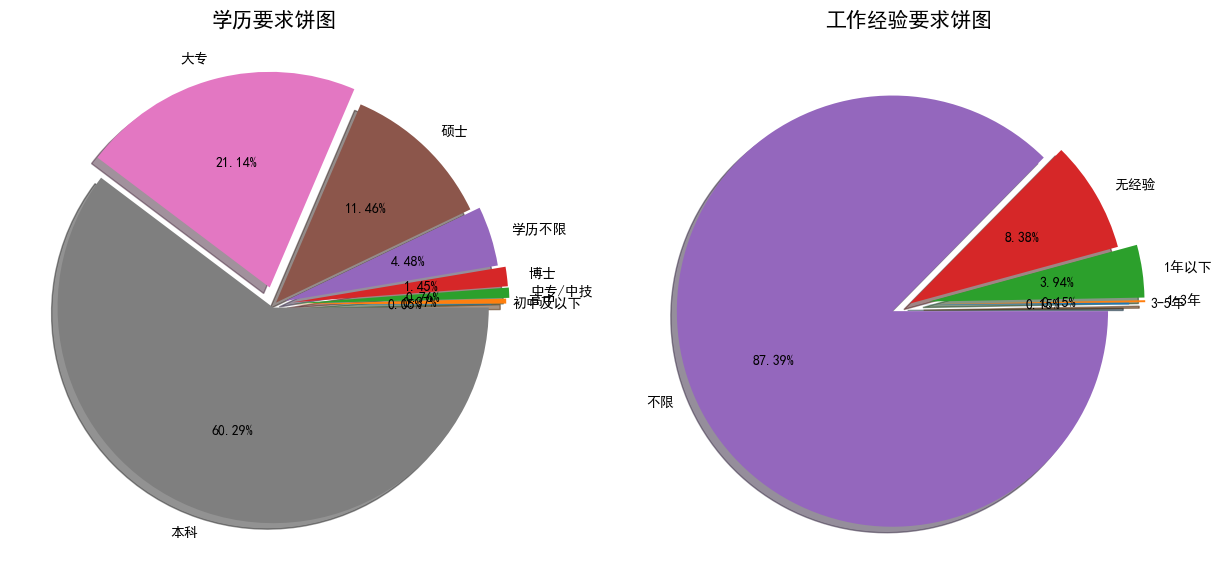

In [462]:
eduLevel = df['education'].value_counts().sort_values(ascending=True)
workingExp = df['workingExp'].value_counts().sort_values(ascending=True)


fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# 生成随机偏移量列表
explode_edu = np.random.uniform(0, 0.1, size=len(eduLevel))
explode_exp = np.random.uniform(0, 0.1, size=len(workingExp))

axes[0].axis('equal')  # 保证长宽相等
axes[0].pie(eduLevel, labels=eduLevel.index, explode=explode_edu,
            autopct='%.2f%%', pctdistance=0.6, shadow=True)
axes[0].set_title('学历要求饼图', fontsize=15)

axes[1].axis('equal')
axes[1].pie(workingExp, labels=workingExp.index, explode=explode_exp, autopct='%.2f%%', pctdistance=0.6, shadow=True)
axes[1].set_title('工作经验要求饼图', fontsize=15)
plt.show()

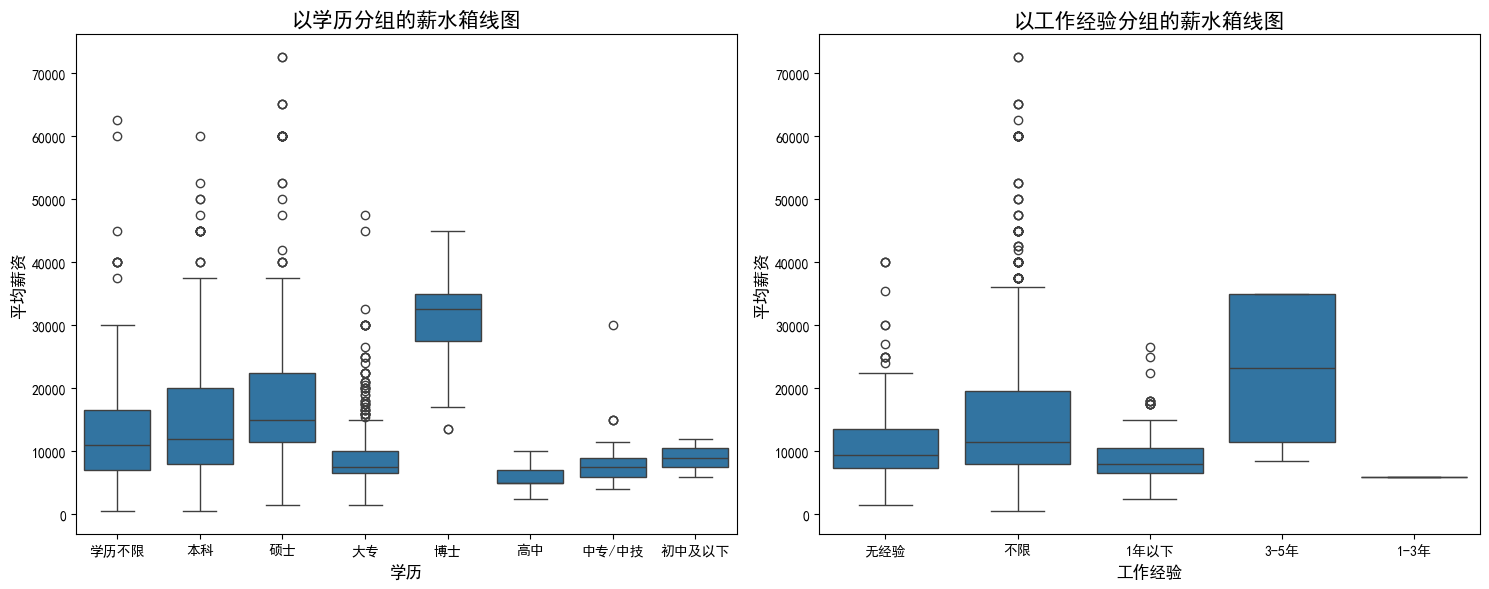

In [464]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置图表大小
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 以学历分组的薪水箱线图
sns.boxplot(x='education', y='avg_salary', data=df, ax=axes[0])
axes[0].set_title('以学历分组的薪水箱线图', fontsize=15)
axes[0].set_xlabel('学历', fontsize=12)
axes[0].set_ylabel('平均薪资', fontsize=12)

# 以工作经验分组的薪水箱线图
sns.boxplot(x='workingExp', y='avg_salary', data=df, ax=axes[1])
axes[1].set_title('以工作经验分组的薪水箱线图', fontsize=15)
axes[1].set_xlabel('工作经验', fontsize=12)
axes[1].set_ylabel('平均薪资', fontsize=12)

# 显示图表
plt.tight_layout()
plt.show()
